In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('chennai_house_price_prediction.csv')
df.head(20)

df['BUILDTYPE'].replace({'Others':'Other','Comercial':'Commercial'},inplace=True)
df['AREA'].nunique()
df

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Other,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Other,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

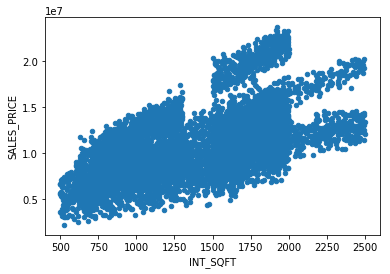

In [4]:
df.plot.scatter('INT_SQFT','SALES_PRICE')
df['BUILDTYPE'].value_counts()

# Hypothesis 1. sales price increases with incr in int sqft


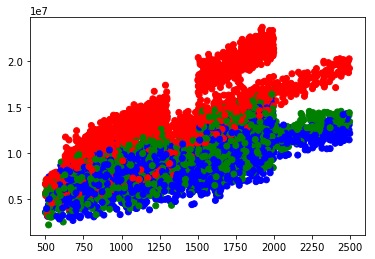

In [5]:
fig,ax=plt.subplots()
colors={'Commercial':'red','House':'blue', 'Other':'green'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x: colors[x]))


## sales price inc with bedroom and bathroom

In [48]:
df.pivot_table(values='SALES_PRICE',columns='N_BATHROOM',index='N_BEDROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168580.0,NaN
2.0,12129780.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


## QS overall with sales price


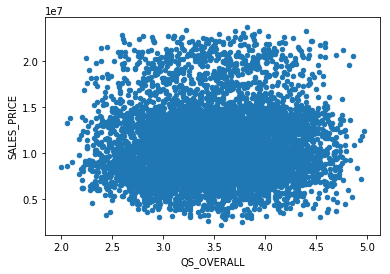

In [54]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

Text(0.5, 1.0, 'overall')

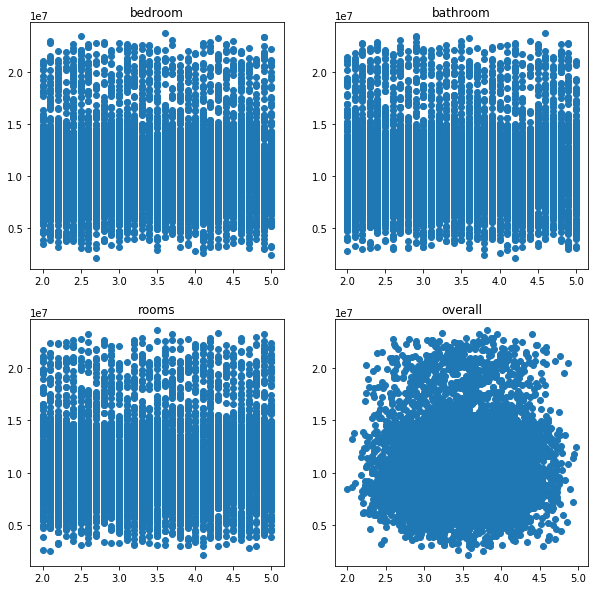

In [75]:
fig,axs=plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)
axs[0,0].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])
axs[0,0].set_title('bedroom')

axs[0,1].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])
axs[0,1].set_title('bathroom')

axs[1,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])
axs[1,0].set_title('rooms')

axs[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])
axs[1,1].set_title('overall')



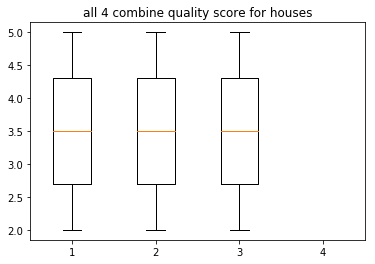

In [86]:
ax=plt.figure().add_subplot(111)
ax.set_title('all 4 combine quality score for houses')
b=ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

# building type and sales price

In [103]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Other          9637260
Name: SALES_PRICE, dtype: int64

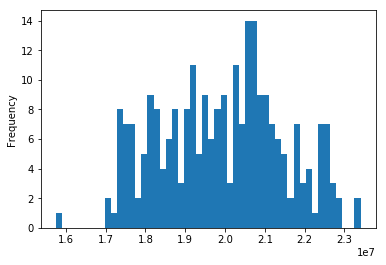

In [118]:
temp=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp['SALES_PRICE'].plot.hist(bins=50)


# surrounding and locality

In [121]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8516800
            Noo            6468090
            Yes            9468150
Other       No             9106920
            Noo            8535580
            Yes           10039405
Name: SALES_PRICE, dtype: int64

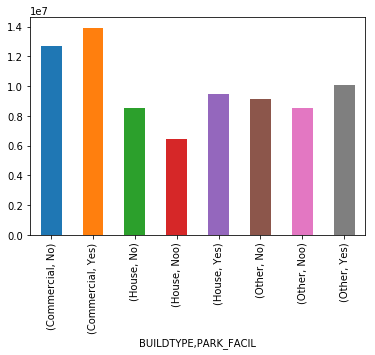

In [123]:
temp=df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind='bar')

In [7]:
a=df.pivot_table(index='AREA',values='SALES_PRICE',aggfunc='median')
a

,SALES_PRICE
AREA,
Adyar,8871195
Adyr,9044045
Ana Nagar,20020970
Ann Nagar,13488705
Anna Nagar,13714220
Chormpet,9593035
Chrmpet,8276185
Chrompet,9607900
Chrompt,9668900


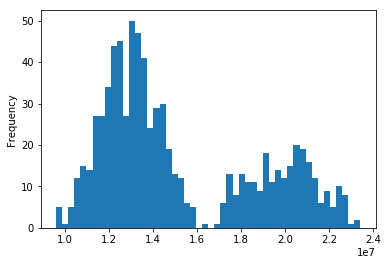

In [136]:
b=df.loc[df['AREA']=='Anna Nagar']
b['SALES_PRICE'].plot(kind='hist',bins=50)

# distance from road affect price

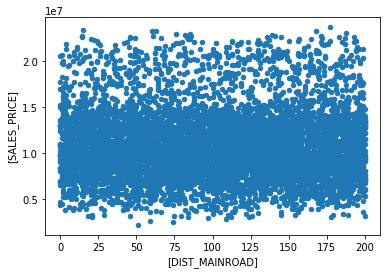

In [141]:
df.plot.scatter(['DIST_MAINROAD'],['SALES_PRICE'])

In [148]:
a=df.groupby('STREET').SALES_PRICE.median()


STREET
Gravel       10847225
No Access     9418295
NoAccess      8372750
Pavd         10947560
Paved        10468415
Name: SALES_PRICE, dtype: int64

In [146]:
a['SALES_PRICE']

KeyError: 'SALES_PRICE'